
## 3.3 Klassifikation mit Random Forests und Boosting

Aufgaben:
- [3.3.1 Random Forests](#3.3.1-Random-Forests)
- [3.3.2 Boosting](#3.3.2-Boosting)
- [3.3.3 Optimierung der Hyperparameter](#3.3.3-Optimierung-der-Hyperparameter)

___

### 3.3.1 Random Forests
Wiederholen Sie Aufgabe [3.1.2](/exercise/exercise_3/exercise_3_1.ipynb) mit einem Random Forest. Teilen Sie dazu den Datensatz wieder in einen Trainings- und Testdatensatz. Bestimmen Sie den Fehler auf den Testdaten und vergleichen Sie ihn mit dem ”out of bag”-Fehler.

Zu Beginn werden wieder die notwendigen Bibliotheken importiert um den Datensatz zu laden und zu verarbeiten. Der [`RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) wird dabei durch das Modul `sklearn.ensemble` bereitgestellt. [`classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) aus dem Modul `sklearn.metrics` wird später benötigt um die Klassifikationsleistung des Modells zu bewerten.

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

Nach dem Laden des Datensatzes wird dieser wieder mittels `train_test_split` in Trainings- und Testdaten aufgeteilt. Um das Ergebnis des Random Forests mit dem aus Aufgabe [3.1.2](/exercise/exercise_3/exercise_3_1.ipynb) vergleichen zu können, wird der Parameter `test_size` wieder auf `0.25` gesetzt, sodass 25% der Daten für den Test verwendet werden.

In [2]:
digits = datasets.load_digits()

X_train, X_test, y_train, y_test = train_test_split(
  digits.data,
  digits.target,
  test_size=0.25,
  shuffle=False
)

Anschließend wird ein Random Forest Classifier mit 100 Entscheidungsbäumen (`n_estimators` default value) erstellt. Der Parameter `oob_score` wird auf `True` gesetzt, damit der "out of bag"-Fehler berechnet werden kann. Zusätzlich wird der Parameter `n_jobs` auf `-1` gesetzt, damit alle verfügbaren Prozessoren für das Training genutzt werden können.

In [3]:
rf = RandomForestClassifier(
  oob_score=True,
  n_jobs=-1
)

rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, oob_score=True)

Anschließend lassen sich wieder die Vorhersagen auf die Trainings- und Testdaten ausgeben:

In [4]:
rf.score(X_train, y_train)

1.0

Auf den Trainingsdatensatz erzielt der Klassifikator wie zu erwarten wieder eine Genauigkeit von 100%. Auf den Testdaten ergibt sich folgende Klassifikationsleistung:

In [5]:
rf.score(X_test, y_test)

0.9333333333333333

Die Genauigkeit liegt mit 92.88% natürlich deutlich unter der des Trainingsdatensatzes ist allerdings um ein wesentliches höher als bei der Suppport Vector Machine aus Aufgabe [3.1.2](/exercise/exercise_3/exercise_3_1.ipynb) mit 53.33%.

Nun lässt sich auch der "out of bag" Score sowie der entsprechende Fehler ausgeben:

In [6]:
print(f"OOB score: {rf.oob_score_}\nOOB error: {1- rf.oob_score_}")

OOB score: 0.9695619896065331
OOB error: 0.03043801039346694


> Der "out of bag" Score gibt an, wie gut der Random Forest auf den Trainingsdaten generalisiert, indem er die Datenpunkte verwendet, die nicht in den Bootstrap-Stichproben für die einzelnen Bäume enthalten sind. Der "out of bag" Fehler ist somit eine Schätzung des Fehlers auf neuen, ungesehenen Daten.

Zum Schluss lässt sich noch ein Klassifikationsbericht ausgeben, der weitere Metriken wie Precision, Recall und F1-Score enthält:

In [7]:
print(
  f"Classification report for classifier {rf} on test-data-set:\n"
  f"{classification_report(y_test, rf.predict(X_test))}\n"
)

Classification report for classifier RandomForestClassifier(n_jobs=-1, oob_score=True) on test-data-set:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.95      0.85      0.90        46
           2       1.00      0.98      0.99        43
           3       0.97      0.79      0.87        47
           4       0.96      0.94      0.95        48
           5       0.94      0.98      0.96        45
           6       0.98      1.00      0.99        47
           7       0.92      0.98      0.95        45
           8       0.82      0.90      0.86        41
           9       0.84      0.96      0.90        45

    accuracy                           0.93       450
   macro avg       0.94      0.93      0.93       450
weighted avg       0.94      0.93      0.93       450




#### Visualisierung OOB-Fehler vs. Anzahl der Bäume

Im bisherigen Verlauf wurde der Random Forest mit einer festen Anzahl von Bäumen (100) trainiert. Es ist jedoch interessant zu sehen, wie sich der "out of bag"-Fehler mit der Anzahl der Bäume verändert. Das folgende Beispiel basiert auf einem [Beispiel von Scikit-Learn](https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_oob.html#sphx-glr-auto-examples-ensemble-plot-gradient-boosting-oob-py) und zeigt, wie der OOB-Fehler mit zunehmender Anzahl von Bäumen abnimmt.

In [ ]:
import matplotlib.pyplot as plt

oob_errors = []
estimators_range = range(10, 301, 10)

for n in estimators_range:
    rf_tmp = RandomForestClassifier(
        n_estimators=n,
        oob_score=True,
        n_jobs=-1,
        bootstrap=True
    )
    rf_tmp.fit(X_train, y_train)
    oob_errors.append(1 - rf_tmp.oob_score_)

plt.figure(figsize=(6,4))
plt.plot(estimators_range, oob_errors, marker="o")
plt.xlabel("n_estimators")
plt.ylabel("OOB Error")
plt.title("RandomForest OOB-Fehler vs. Anzahl Bäume")
plt.grid(alpha=0.3)
plt.show()

#### Fazit
- Die **Trainingsgenauigkeit** von 100% zeigt, dass sich das Modell vollständig an die Trainingsdaten anpasst (Hinweis auf *mögliches Overfitting*).
- Die **Testgenauigkeit** von 92.88% zeigt eine sehr gute Generalisierung auf ungesehenen Daten und ist deutlich besser als das SVM-Ergebnis (53.33%).
- Der **out-of-bag-Score** (OOB) liefert eine interne Schätzung der Generalisierungsleistung. Der OOB-Score liegt mit 97.52% etwas höher als die Testgenauigkeit (Testgenauigkeit: 92.88%) was jedoch auf eine **gute Generalisierung** des Modells hinweist.
- Der Classification Report zeigt Precision, Recall und F1 pro Klasse womit sich besonders **fehleranfällige Ziffern** identifizieren. Ähnlich wie bei der SVM sind die Ziffern 3, 8 und 9 schwieriger zu klassifizieren was wahrscheinlich an ihrer ähnlichen Form liegt.

___

### 3.3.2 Boosting

Wiederholen sie Aufgabe 1 b mit einem Boosting-Verfahren. Sie können dazu entweder die Implementierung von *sklearn* verwenden oder Sie installieren *xgboost* ([xgboost](`https://github.com/dmlc/xgboost`)) oder *catboost* (`https://catboost.ai/docs/`).

#### Implementierung mit klassischem Gradient Boosting ([`GradientBoostingClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html))

In [166]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

In [167]:
digits = datasets.load_digits()

X_train, X_test, y_train, y_test = train_test_split(
  digits.data,
  digits.target,
  test_size=0.25,
  shuffle=False
)

In [168]:
gb = GradientBoostingClassifier(
  learning_rate=0.1 # default value
)

In [169]:
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [170]:
print(f"GradientBoosting  - Train acc: {gb.score(X_train, y_train):.4f} | Test acc: {gb.score(X_test, y_test):.4f}\n")
print("Classification report (GB):\n", classification_report(y_test, gb.predict(X_test)))

GradientBoosting  - Train acc: 1.0000 | Test acc: 0.8933

Classification report (GB):
               precision    recall  f1-score   support

           0       0.88      0.98      0.92        43
           1       0.88      0.80      0.84        46
           2       1.00      0.91      0.95        43
           3       0.92      0.72      0.81        47
           4       0.94      0.92      0.93        48
           5       0.96      0.98      0.97        45
           6       1.00      0.91      0.96        47
           7       0.88      0.98      0.93        45
           8       0.74      0.90      0.81        41
           9       0.79      0.84      0.82        45

    accuracy                           0.89       450
   macro avg       0.90      0.89      0.89       450
weighted avg       0.90      0.89      0.89       450



##### Optimierung des Gradient Boosting Classifiers

Laut der Dokumentation von [`GradientBoostingClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) steigt die Trainingsgenauigkeit mit der Anzahl der Basis-Estimatoren (Schwache Lerner). Daher mal noch ein Versuch mit 300 Basis-Estimators:

In [171]:
gb = GradientBoostingClassifier(
  learning_rate=0.1, # default value
  n_estimators=300
)

In [172]:
gb.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=300)

In [173]:
print(f"GradientBoosting  - Train acc: {gb.score(X_train, y_train):.4f} | Test acc: {gb.score(X_test, y_test):.4f}\n")
print("Classification report (GB):\n", classification_report(y_test, gb.predict(X_test)))

GradientBoosting  - Train acc: 1.0000 | Test acc: 0.9133

Classification report (GB):
               precision    recall  f1-score   support

           0       0.88      0.98      0.92        43
           1       0.89      0.87      0.88        46
           2       0.95      0.91      0.93        43
           3       0.97      0.74      0.84        47
           4       1.00      0.94      0.97        48
           5       0.96      0.98      0.97        45
           6       0.98      0.96      0.97        47
           7       0.87      1.00      0.93        45
           8       0.80      0.90      0.85        41
           9       0.87      0.87      0.87        45

    accuracy                           0.91       450
   macro avg       0.92      0.91      0.91       450
weighted avg       0.92      0.91      0.91       450



##### Visualisierung der Lernkurve

Der folgende Code visualisiert die Lernkurve des Gradient Boosting Classifiers mit 300 Basis-Estimators. Die Lernkurve zeigt, wie sich die Trainings- und Validierungsgenauigkeit mit zunehmender Anzahl von Trainingsbeispielen verändert. Der Code beruht auf dem [sklearn Beispiel zu Visualisierung von Lernkurven](https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html).

In [174]:
digits = datasets.load_digits()

In [175]:
X_train, X_test, y_train, y_test = train_test_split(
  digits.data,
  digits.target,
  test_size=0.25,
  shuffle=False
)

Um auf die Parameter später beim Plotten zugreifen zu können müssen diese nun in einem Dictionary gespeichert werden.

In [176]:
gb_params = {
  "n_estimators": 300,
  "max_depth": 3,
  "learning_rate": 0.1
}

In [177]:
gb = GradientBoostingClassifier(
  **gb_params
)

In [178]:
gb.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=300)

Damit die Lernkurve evtl. auch für weitere Boosting Modelle genutzt werden kann, wird die Funktion `plot_learning_curve` definiert. Wird diese Funktion mit einem Modell und den Trainingsdaten aufgerufen, so wird die Lernkurve für das übergebene Modell geplottet.

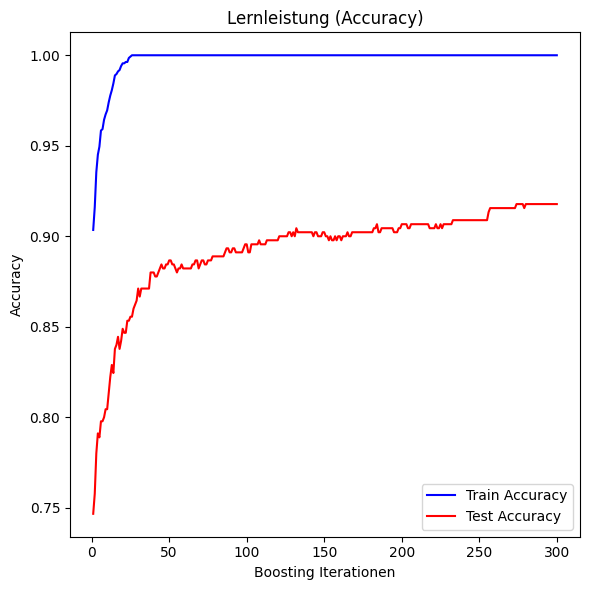

In [179]:
def plot_accuracy_curve(iterations, classifier, X_train, y_train, X_test, y_test):
    import numpy as np
    import matplotlib.pyplot as plt

    test_accuracy = np.zeros(iterations)
    train_accuracy = np.zeros(iterations)

    for i, y_pred in enumerate(zip(classifier.staged_predict(X_test))):
        acc = (y_pred == y_test).mean()
        if acc == 0:
            break
        test_accuracy[i] = acc

    for i, y_pred_train in enumerate(classifier.staged_predict(X_train)):
        acc = (y_pred_train == y_train).mean()
        if acc == 0:
            break
        train_accuracy[i] = acc

    fig = plt.figure(figsize=(6,6))

    # Accuracy
    plt.plot(np.arange(iterations) + 1, train_accuracy, 'b-', label='Train Accuracy')
    plt.plot(np.arange(iterations) + 1, test_accuracy, 'r-', label='Test Accuracy')
    plt.xlabel("Boosting Iterationen")
    plt.ylabel("Accuracy")
    plt.title("Lernleistung (Accuracy)")
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_accuracy_curve(gb_params["n_estimators"], gb, X_train, y_train, X_test, y_test)

#### Implementierung mit Early Stopping ([`HistGradientBoostingClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingClassifier.html))

In [180]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report

In [181]:
digits = datasets.load_digits()

# Split wie in 3.3.1 zur Vergleichbarkeit
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target,
    test_size=0.25,
    shuffle=False
)

In [182]:
hgb_params = {
  "learning_rate": 0.1,
  "max_iter":300,
  "early_stopping":True
}

In [183]:
hgb = HistGradientBoostingClassifier(
  **hgb_params
)

In [184]:
hgb.fit(X_train, y_train)

HistGradientBoostingClassifier(early_stopping=True, max_iter=300)

In [185]:
print(f"\nHistGradientBoosting - Train acc: {hgb.score(X_train, y_train):.4f} | Test acc: {hgb.score(X_test, y_test):.4f}\n")
print("Classification report (HGB):\n", classification_report(y_test, hgb.predict(X_test)))


HistGradientBoosting - Train acc: 0.9978 | Test acc: 0.9111

Classification report (HGB):
               precision    recall  f1-score   support

           0       0.91      0.95      0.93        43
           1       0.85      0.87      0.86        46
           2       0.95      0.95      0.95        43
           3       0.98      0.85      0.91        47
           4       0.98      0.94      0.96        48
           5       0.96      0.98      0.97        45
           6       0.98      0.96      0.97        47
           7       0.94      0.98      0.96        45
           8       0.79      0.76      0.77        41
           9       0.78      0.87      0.82        45

    accuracy                           0.91       450
   macro avg       0.91      0.91      0.91       450
weighted avg       0.91      0.91      0.91       450



In der visuellen Darstellung der Lernkurve ist das hier aktivierte `early_stopping` zu erkennen. Das Modell hat bereits bei 50 Basis-Estimators aufgehört zu lernen, da sich die Validierungsgenauigkeit nicht mehr verbessert hat.

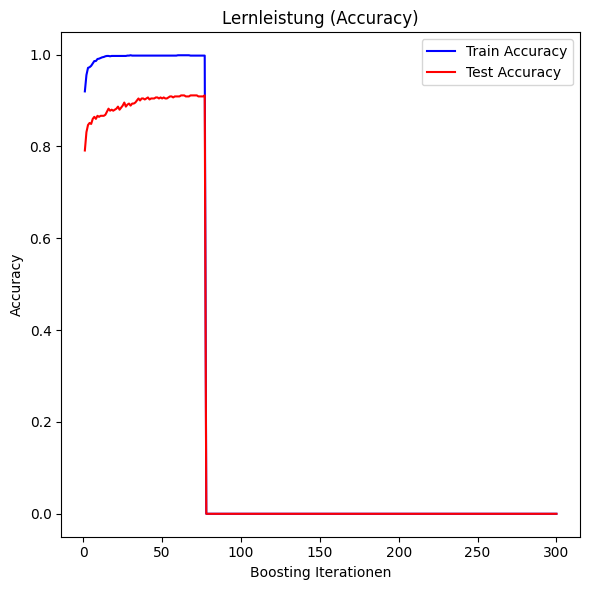

In [186]:
plot_accuracy_curve(hgb_params["max_iter"], hgb, X_train, y_train, X_test, y_test)

#### Implementierung mit XGBoost

##### Installation von XGBoost

Um XGBoost kann via pip wie folgt installiert werden:

```bash
pip install xgboost
```

In [187]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

In [188]:
digits = datasets.load_digits()

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, 
    digits.target,
    test_size=0.25,
    shuffle=False,
)

In [189]:
xgb = XGBClassifier(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.9,
    reg_lambda=1.0,
    objective="multi:softprob",
    eval_metric="mlogloss",
    n_jobs=-1
)

In [190]:
xgb.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=False # reduce output when fitting
)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=-1, num_parallel_tree=None, objective='multi:softprob', ...)

In [191]:
train_acc = (xgb.predict(X_train) == y_train).mean()
test_pred = xgb.predict(X_test)
test_acc = (test_pred == y_test).mean()

In [192]:
print(f"XGBoost - Train acc: {train_acc:.4f} | Test acc: {test_acc:.4f}")
print("\nClassification report (XGBoost):\n", classification_report(y_test, test_pred))

XGBoost - Train acc: 1.0000 | Test acc: 0.8978

Classification report (XGBoost):
               precision    recall  f1-score   support

           0       0.91      0.98      0.94        43
           1       0.84      0.80      0.82        46
           2       0.98      0.93      0.95        43
           3       0.95      0.77      0.85        47
           4       1.00      0.92      0.96        48
           5       0.91      0.96      0.93        45
           6       0.96      0.96      0.96        47
           7       0.94      0.98      0.96        45
           8       0.77      0.83      0.80        41
           9       0.75      0.87      0.80        45

    accuracy                           0.90       450
   macro avg       0.90      0.90      0.90       450
weighted avg       0.90      0.90      0.90       450



In [193]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

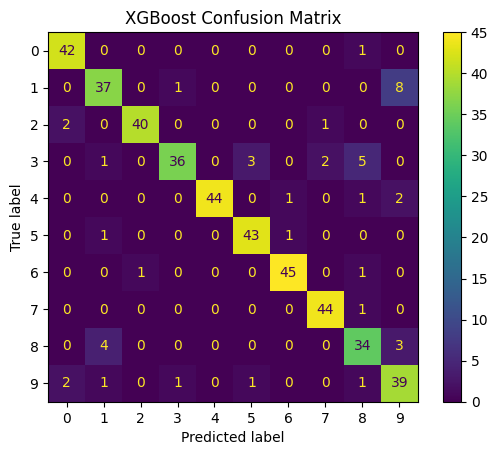

In [194]:
ConfusionMatrixDisplay.from_predictions(y_test, test_pred)
plt.title("XGBoost Confusion Matrix")
plt.show()

___

### 3.3.3 Optimierung der Hyperparameter

Optional: Finden Sie die optimalen Hyperparameter der Algorithmen mit der in [3.2.4](/exercise/exercise_3/exercise_3_2.ipynb) beschriebenen Gittersuche.

#### Optimierung für XGBoost

In [195]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier

In [196]:
digits = datasets.load_digits()

X_train, X_test, y_train, y_test = train_test_split(
    digits.data,
    digits.target,
    test_size=0.25,
)

Anschließend wird wie für die SVM (hier waren es $\gamma$ und $C$) ein Gitter für die Hyperparameter des Boosting-Verfahrens erstellt. Für `XGBoost` bieten sich hierbei die folgenden Parameter an:
- `n_estimators`: Anzahl der Basis-Estimatoren (Schwache Lerner)
- `max_depth`: Maximale Tiefe der einzelnen Entscheidungsbäume
- `learning_rate`: Lernrate des Boosting-Verfahrens
- `subsample`: Anteil der Trainingsdaten, die für das Training jedes Basis-Estimators verwendet werden
- `colsample_bytree`: Anteil der Merkmale, die für das Training jedes Basis-Estimators verwendet werden
- `min_child_weight`: Minimales Gewicht, das ein Blattknoten haben muss, um weiter aufgeteilt zu werden

In [197]:
param_grid = {
    "n_estimators": [200, 300, 400, 500],
    "max_depth": [3, 4, 5, 6],
    "learning_rate": [0.05, 0.075, 0.1, 0.2],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0],
    "min_child_weight": [1, 5]
}


Auch bei der definition des XGBoost-Klassifikators können weitere Parameter zur Optimierung festgelegt werden:
- `objective`: Definiert die Lernaufgabe und die entsprechende Lernmethode. Laut der Dokumentation bietet sich für das hier vorliegende Mehrklassenklassifikationsproblem der Wert `multi:softmax` an wobei hierbei auch die Anzahl der Klassen (`num_class`) angegeben werden muss.
- `eval_metric`: Bewertungsmetrik für die Validierungsdaten. Für Mehrklassenklassifikationsprobleme kann hier `mlogloss` (multiclass logloss) verwendet werden.

In [198]:
xgb = XGBClassifier(
    objective="multi:softmax",
    num_class=10,
    eval_metric="mlogloss",
    n_jobs=-1,
    verbosity=0
)

In [199]:
grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring="accuracy",
    cv=3,
    n_jobs=-1,
    verbose=0
)

Nun kann die Gittersuche durchgeführt werden um die optimalen Hyperparameter zu finden. Dies kann je nach Gittergröße (Anzahl der Parameterkombinationen) auch bei einem eigentlich kleinen Datensatz wie dem hier verwendeten MNIST-Datensatz einige Zeit in Anspruch nehmen.

In [200]:
grid.fit(X_train, y_train)

/home/simon/.local/lib/python3.8/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(
/home/simon/.local/lib/python3.8/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features 

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=-1, num_class=10,
                                     num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.05, 0.075, 0.1, 0.2],
                         'max_depth': [3, 4, 5, 6], 'min_child_weight': [1, 5],
                         'n_estimators': [200, 300, 400, 500],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy')

In [201]:
print("Best params:", grid.best_params_)
print("Best CV accuracy:", grid.best_score_)

Best params: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.8}
Best CV accuracy: 0.9606533036377135


Die oben gezeigte Ausgabe zeigt die besten Hyperparameter, die durch die Gittersuche gefunden wurden, diese lauten:

- `n_estimators`: **300**       (Anzahl der Basis-Estimatoren)
- `max_depth`: **3**            (Maximale Tiefe der einzelnen Entscheidungsbäume)
- `learning_rate`: **0.2**      (Lernrate des Boosting-Verfahrens)
- `subsample`: **0.8**         (Anteil der Trainingsdaten, die für das Training jedes Basis-Estimators verwendet werden)
- `colsample_bytree`: **0.8**   (Anteil der Merkmale, die für das Training jedes Basis-Estimators verwendet werden)
- `min_child_weight`: **1**     (Minimales Gewicht, das ein Blattknoten haben muss, um weiter aufgeteilt zu werden)


In [202]:
best_model = grid.best_estimator_
test_acc = (best_model.predict(X_test) == y_test).mean()
print("Test accuracy (best model):", f"{test_acc:.4f}")

Test accuracy (best model): 0.9689
